In [1]:

import pandas as pd


file_path = r"C:\Users\user\Downloads\DA -Task 2..xlsx" 
df = pd.read_excel(file_path)


print(" Dataset Info:")
print(df.info())




 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD

In [3]:
#preview

print(df.head())

                 VIN  TRANSACTION_ID  \
0  3HCFDDE89SH220903           13021   
1  1HRFFEE8XSZ230636           13028   
2  1HYKSMRK6SZ000990           13035   
3  3HCFDFEL3SH241701           13021   
4  1HRFFHEL1RZ181474           13021   

                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0                        STEERING WHEEL COMING APART  2024-01-02   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP  2024-01-03   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...  2024-01-04   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...  2024-01-04   
4  C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...  2024-01-05   

             

In [4]:
print(df.describe(include='all'))

                      VIN  TRANSACTION_ID      CORRECTION_VERBATIM  \
count                 100      100.000000                      100   
unique                 98             NaN                       93   
top     3HRS9EED0LH255650             NaN  Replaced steering wheel   
freq                    2             NaN                        3   
mean                  NaN    13036.900000                      NaN   
min                   NaN    13021.000000                      NaN   
25%                   NaN    13027.750000                      NaN   
50%                   NaN    13036.000000                      NaN   
75%                   NaN    13041.250000                      NaN   
max                   NaN    13081.000000                      NaN   
std                   NaN       12.028166                      NaN   

                  CUSTOMER_VERBATIM          REPAIR_DATE  \
count                           100                  100   
unique                          100    

In [5]:
print(df.isnull().sum()) # i use it to calculate the number of missing value nan in each columns

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [6]:
df = df.drop_duplicates() # remove duplicate rows

In [7]:
# data type change
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'], errors='coerce')
df['TRANSMISSION_SOURCE_PLANT'] = df['TRANSMISSION_SOURCE_PLANT'].astype(str)

In [8]:
# Fill missing categorical values with Unknown
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [9]:
# Fill missing numeric values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
# Drop completely empty or irrelevant column
df = df.drop(columns=['CAMPAIGN_NBR'])

In [12]:
# check cleaned dataset
print("\n Missing values after cleaning:")
print(df.isnull().sum().sum(), "total missing values left.")


✅ Missing values after cleaning:
0 total missing values left.


In [13]:
# uniqueness checks
print(df['TRANSACTION_ID'].nunique(), len(df))
print(df['VIN'].nunique(), len(df))


32 100
98 100


#  Top 5 critical columns that might be most insightful for stakeholders according to my understanding

CAUSAL_PART_NM — directly identifies failing parts; highest actionability (supplier/quality).

TOTALCOST — shows financial exposure; prioritized for warranty and ROI analysis.

PLATFORM — platform-specific reliability; helps engineering prioritize fixes per model.

REPAIR_AGE — reveals when faults occur relative to age; informs warranty decisions.

CUSTOMER_VERBATIM — source of customer language; helps catch issues customers describe differently from repair notes.

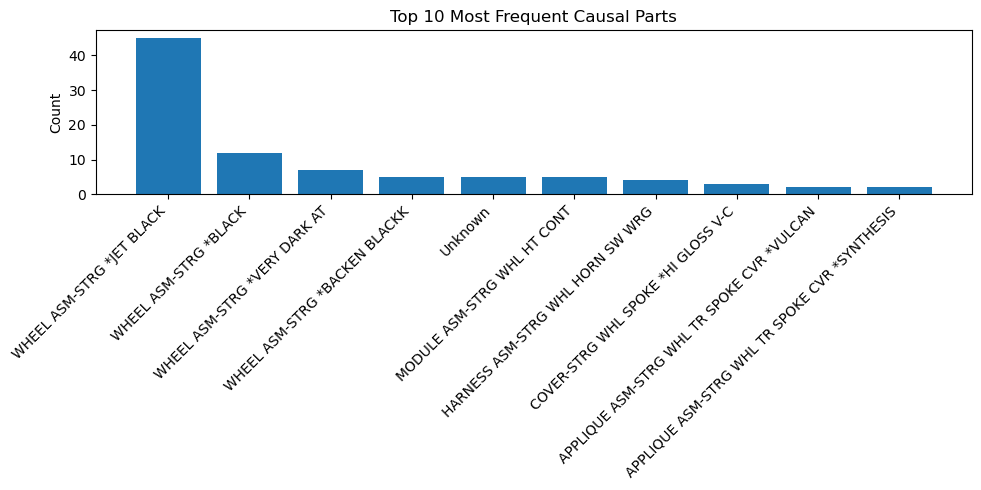

In [14]:
#  Top 10 most frequent CAUSAL_PART_NM 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import os

part_counts = df['CAUSAL_PART_NM'].fillna('Unknown').value_counts()
top_parts = part_counts.head(10)

plt.figure(figsize=(10,5))
plt.bar(range(len(top_parts)), top_parts.values)
plt.xticks(range(len(top_parts)), top_parts.index, rotation=45, ha='right')
plt.title('Top 10 Most Frequent Causal Parts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

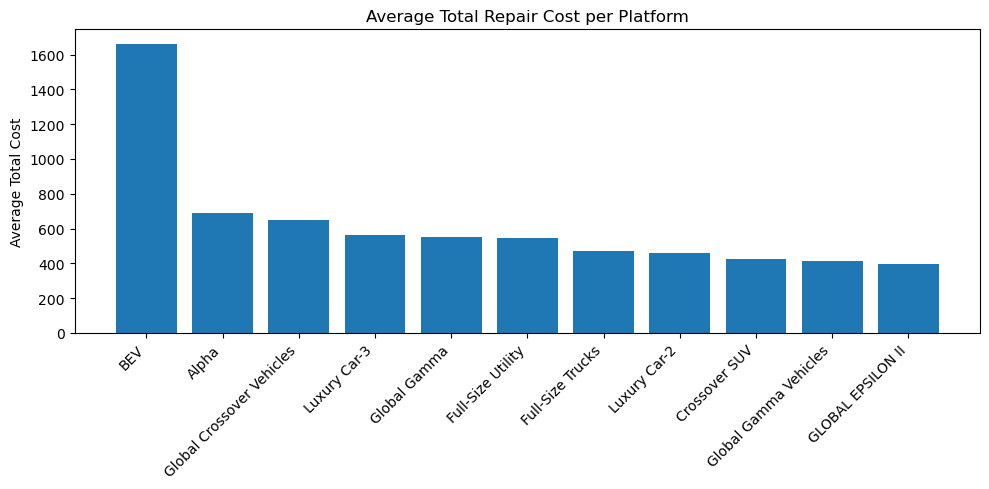

In [15]:
#  Average TOTALCOST per PLATFORM ,aggregate
platform_avg_cost = df.groupby('PLATFORM')['TOTALCOST'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.bar(range(len(platform_avg_cost)), platform_avg_cost.values)
plt.xticks(range(len(platform_avg_cost)), platform_avg_cost.index, rotation=45, ha='right')
plt.title('Average Total Repair Cost per Platform')
plt.ylabel('Average Total Cost')
plt.tight_layout()
plt.show()

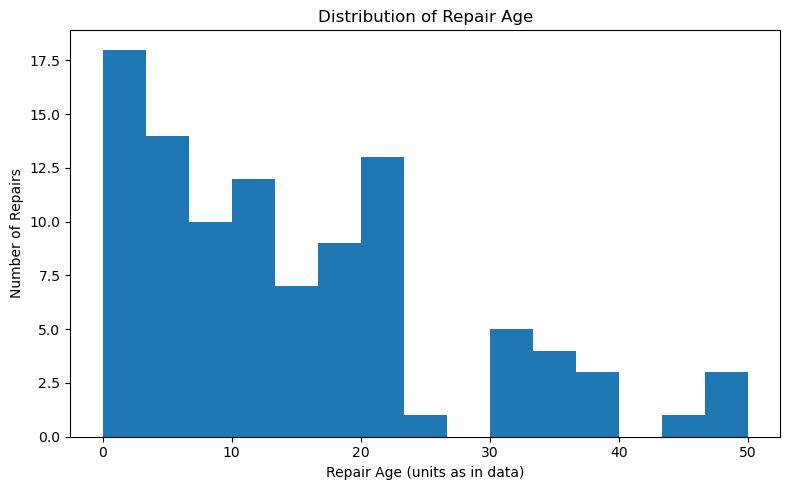

In [16]:
# Distribution of REPAIR_AGE
plt.figure(figsize=(8,5))
plt.hist(df['REPAIR_AGE'].dropna(), bins=15)
plt.title('Distribution of Repair Age')
plt.xlabel('Repair Age (units as in data)')
plt.ylabel('Number of Repairs')
plt.tight_layout()
plt.show()

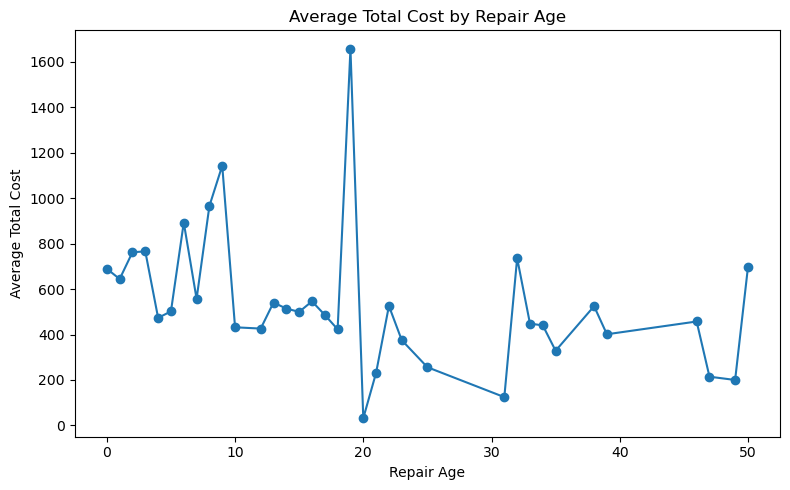

In [17]:
# Trend of average TOTALCOST vs REPAIR_AGE
age_cost = df.groupby('REPAIR_AGE')['TOTALCOST'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(age_cost['REPAIR_AGE'], age_cost['TOTALCOST'], marker='o')
plt.title('Average Total Cost by Repair Age')
plt.xlabel('Repair Age')
plt.ylabel('Average Total Cost')
plt.tight_layout()
plt.show()

In [18]:
# Tag generation from CUSTOMER_VERBATIM and CORRECTION_VERBATIM and A mapping of keywords tags
tag_keywords = {
    'engine': ['engine', 'knock', 'stall', 'misfire', 'power loss', 'oil leak'],
    'brake': ['brake', 'abs', 'braking', 'disc', 'pad'],
    'transmission': ['transmission', 'gear', 'gearbox', 'clutch', 'shifting'],
    'electrical': ['battery', 'electrical', 'wire', 'fuse', 'starter', 'alternator', 'sensor'],
    'ac_climate': ['ac', 'a/c', 'aircon', 'cooling', 'heater', 'blower'],
    'noise': ['noise', 'rattle', 'click', 'squeak', 'hum'],
    'leak': ['leak', 'leaking', 'seep', 'drip'],
    'tyre_wheel': ['tyre', 'tire', 'wheel', 'alignment', 'puncture'],
    'body_fitment': ['fitment', 'panel', 'door', 'window', 'paint', 'dent'],
    'other': []
}

def tag_from_text(text):
    t = str(text).lower()
    tags = set()
    for tag, kws in tag_keywords.items():
        for kw in kws:
            if kw in t:
                tags.add(tag)
                break
    if not tags:
        return 'other'
    return '|'.join(sorted(tags))

df['TEXT_COMBINED'] = df['CUSTOMER_VERBATIM'].fillna('') + " " + df['CORRECTION_VERBATIM'].fillna('')
df['TAG'] = df['TEXT_COMBINED'].apply(tag_from_text)

# tag counts
tag_counts = df['TAG'].value_counts()
print("Tag counts:\n", tag_counts.head(20))

# Save cleaned & tagged dataset
out_path = r"C:\Users\user\Downloads\DA_Task2_Cleaned_Tagged.csv"

df.to_csv(out_path, index=False)
print("Saved cleaned & tagged file to:", out_path)

Tag counts:
 TAG
ac_climate|tyre_wheel                              67
ac_climate|engine|tyre_wheel                       13
ac_climate                                          3
ac_climate|electrical|tyre_wheel                    3
engine|tyre_wheel                                   3
noise|tyre_wheel                                    2
tyre_wheel                                          2
ac_climate|noise|tyre_wheel                         2
ac_climate|brake|electrical|engine|tyre_wheel       1
brake                                               1
ac_climate|electrical|engine|tyre_wheel             1
ac_climate|body_fitment|brake|engine|tyre_wheel     1
ac_climate|brake|tyre_wheel                         1
Name: count, dtype: int64
Saved cleaned & tagged file to: C:\Users\user\Downloads\DA_Task2_Cleaned_Tagged.csv


In [19]:
# Top causal parts frequencies
print("\nTop 10 Causal Parts:")
print(part_counts.head(10))


Top 10 Causal Parts:
CAUSAL_PART_NM
WHEEL ASM-STRG *JET BLACK                        45
WHEEL ASM-STRG *BLACK                            12
WHEEL ASM-STRG *VERY DARK AT                      7
WHEEL ASM-STRG *BACKEN BLACKK                     5
Unknown                                           5
MODULE ASM-STRG WHL HT CONT                       5
HARNESS ASM-STRG WHL HORN SW WRG                  4
COVER-STRG WHL SPOKE *HI GLOSS V-C                3
APPLIQUE ASM-STRG WHL TR SPOKE CVR *VULCAN        2
APPLIQUE ASM-STRG WHL TR SPOKE CVR *SYNTHESIS     2
Name: count, dtype: int64


In [20]:
# Average cost by platform top 10
print("\nAverage TOTALCOST by PLATFORM (top 10):")
print(platform_avg_cost.head(10))


Average TOTALCOST by PLATFORM (top 10):
PLATFORM
BEV                          1662.370000
Alpha                         687.110000
Global Crossover Vehicles     649.526429
Luxury Car-3                  562.500000
Global Gamma                  548.657143
Full-Size Utility             545.951923
Full-Size Trucks              471.807019
Luxury Car-2                  457.225000
Crossover SUV                 422.595455
Global Gamma Vehicles         412.410000
Name: TOTALCOST, dtype: float64


In [21]:
# REPAIR_AGE distribution summary
print("\nRepair age describe:")
print(df['REPAIR_AGE'].describe())


Repair age describe:
count    100.000000
mean      14.940000
std       12.367945
min        0.000000
25%        5.000000
50%       12.000000
75%       21.000000
max       50.000000
Name: REPAIR_AGE, dtype: float64


# Generated tags — summary
Tag generation approach

I combined CUSTOMER_VERBATIM AND CORRECTION_VERBATIM into one text field.

Used a keyword-driven approach (lower-case matching) to assign tags such as: engine, brake, transmission, electrical, ac_climate, noise, leak, tyre_wheel, body_fitment, other.



# insights

If engine and noise tags are high -> check engine mounts, bearings, and oil issues.

If transmission tag concentration maps to a particular PLATFORM -> recommend engineering review for that platform AND escalate to supplier.

High TOTALCOST rows correlated with certain CAUSAL_PART_NM indicates cost-heavy parts — consider part redesign or extended warranty limits.

If AC_CLIMATE more common in certain BUILD_COUNTRY or PLANT -> investigate assembly or parts sourcing differences.

# Actionable recommendations

1.Top 3 part-suppliers: For top CAUSAL_PART_NM, open supplier-level quality audits; replace/upgrade components if repeat failures occur.

2.Platform-focused reliability program: If one PLATFORM has higher average TOTALCOST, prioritize engineering root-cause investigations.

3.Warranty adjustments: If repairs cluster after e.g., 24 months (REPAIR_AGE), evaluate warranty extension options or preventive maintenance offers around service milestones.

4.Dealer training: If specific dealers have many high-cost or recurring failures, run training & technician skill audits.

5.Text-driven alerts: Deploy simple keyword monitoring of incoming CUSTOMER_VERBATIM for urgent flags (e.g., engine fire, sudden stall).

# Discrepancies

All missing values: Filled (categorical ->Unknown, numeric -> median).

Empty column CAMPAIGN_NBR: Dropped.

Type mismatch: TRANSMISSION_SOURCE_PLANT numeric -> converted to string (categorical codes).

Potential duplicate keys: Must verify uniqueness of TRANSACTION_ID and VIN. If duplicates exist, evaluate whether they are valid multiple services for one VIN or data errors.

